In [195]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import table

### Note: Skip this section. This is just table trivia for creating table as png for the poster

In [191]:
!ls ../output/logs/*.json

../output/logs/efficientnet_b0_fixed_color_training_results.json
../output/logs/efficientnet_b0_rand_color_training_results.json
../output/logs/resnet18_fixed_color_training_results.json
../output/logs/resnet18_rand_color_training_results.json
../output/logs/simple_cnn_fixed_color_training_results.json
../output/logs/simple_cnn_rand_color_training_results.json
../output/logs/vgg16_fixed_color_training_results.json
../output/logs/vgg16_rand_color_training_results.json


In [196]:
columns = ['model_name', 'epoch', 'train_loss', 'train_acc', 'val_loss', 'val_acc']
df_club = pd.DataFrame(columns = columns)

In [197]:
for file_name in os.listdir('../output/logs/'):
    if file_name.endswith('.json'):
        test = {}
        df = pd.read_json('../output/logs/'+file_name) 
        model_name = file_name.split('/')[-1].split('_training_results.json')[0]
        test['model_name'] = model_name
        test['epoch'] = df.iloc[df['val_acc'].idxmax()].epoch
        test['train_loss'] = df.iloc[df['val_acc'].idxmax()].train_loss
        test['train_acc'] = df.iloc[df['val_acc'].idxmax()].train_acc
        test['val_loss'] = df.iloc[df['val_acc'].idxmax()].val_loss
        test['val_acc'] = df.iloc[df['val_acc'].idxmax()].val_acc
        df_club.loc[len(df_club)] = test

In [198]:
df_club

,model_name,epoch,train_loss,train_acc,val_loss,val_acc
0,simple_cnn_fixed_color,9.0000,0.0148,0.9954,0.0139,0.9952
1,efficientnet_b0_rand_color,1.0000,0.0045,0.9984,0.0001,1.0000
2,vgg16_rand_color,5.0000,0.0132,0.9966,0.0019,0.9995
3,vgg16_fixed_color,7.0000,0.0135,0.9969,0.0027,0.9994
4,efficientnet_b0_fixed_color,4.0000,0.0031,0.9993,0.0002,1.0000
5,resnet18_fixed_color,2.0000,0.0016,0.9994,0.0001,1.0000
6,resnet18_rand_color,5.0000,0.0022,0.9994,0.0001,1.0000
7,simple_cnn_rand_color,8.0000,0.0219,0.9928,0.0182,0.9939


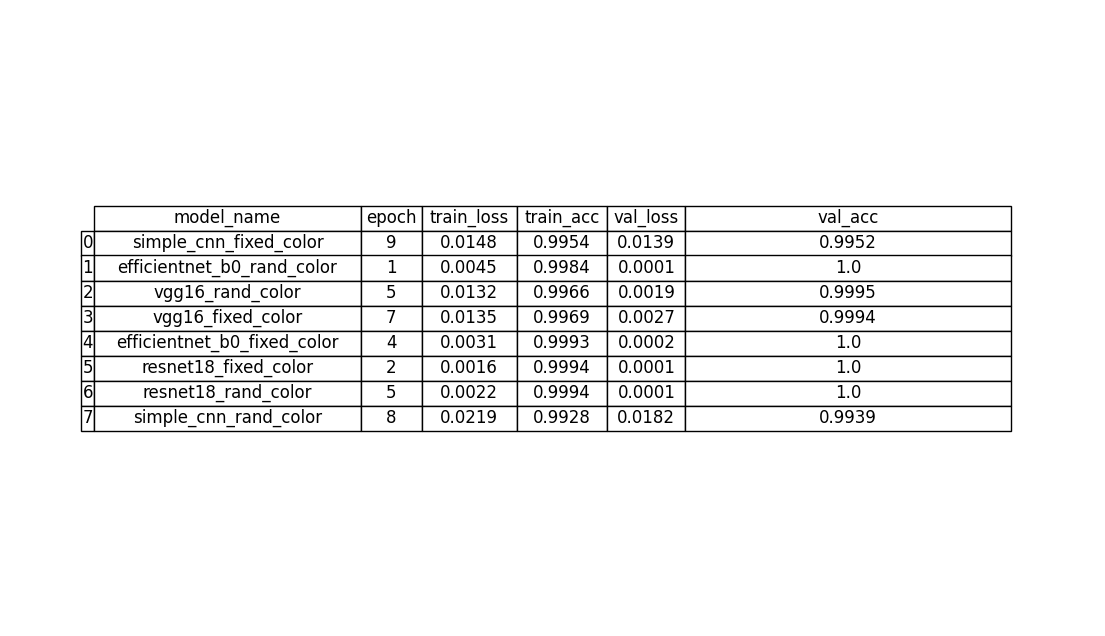

In [199]:
# Your DataFrame data
data = {
    'model_name': [
        'simple_cnn_fixed_color', 'efficientnet_b0_rand_color', 'vgg16_rand_color',
        'vgg16_fixed_color', 'efficientnet_b0_fixed_color', 'resnet18_fixed_color',
        'resnet18_rand_color', 'simple_cnn_rand_color'
    ],
    'epoch': [9, 1, 5, 7, 4, 2, 5, 8],
    'train_loss': [0.0148, 0.0045, 0.0132, 0.0135, 0.0031, 0.0016, 0.0022, 0.0219],
    'train_acc': [0.9954, 0.9984, 0.9966, 0.9969, 0.9993, 0.9994, 0.9994, 0.9928],
    'val_loss': [0.0139, 0.0001, 0.0019, 0.0027, 0.0002, 0.0001, 0.0001, 0.0182],
    'val_acc': [0.9952, 1.0000, 0.9995, 0.9994, 1.0000, 1.0000, 1.0000, 0.9939]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Round all numerical columns to 4 decimal places
df[['epoch', 'train_loss', 'train_acc', 'val_loss', 'val_acc']] = df[['epoch', 'train_loss', 'train_acc', 'val_loss', 'val_acc']].round(4)

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 8))  # Set the size of the poster
ax.axis('off')  # Remove axis

# Plot the table on the figure
tbl = table(ax, df, loc='center', cellLoc='center', colWidths=[0.2] * len(df.columns))

# Style the table for better presentation
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)  # Adjust font size to fit your design
tbl.scale(1.5, 1.5)  # Adjust the table scaling to make it larger or smaller
tbl.auto_set_column_width([0, 1, 2, 3, 4])  # Adjust column width based on data

plt.savefig('model_performance_poster.png', bbox_inches='tight', pad_inches=0.1, dpi=300)

# Show the plot (for viewing before saving)
plt.show()

### The Actual Visualizer!!

### Change the if condition here from `== rand` to `!= rand` to generate the hypothetical world scenario  

In [203]:
df_clubbed_mean = pd.DataFrame()
df_clubbed_std = pd.DataFrame()
for file_name in os.listdir('../output/logs/'):
    if file_name.endswith('.csv'):
        # print(file_name.split('_'))
        if file_name.split('_')[-4] == "rand":
            df = pd.read_csv('../output/logs/'+file_name)
            prefix = file_name.split('.')[0]
            df = df.groupby('y_true')['score'].agg(['mean', 'std']).reset_index()
            df_clubbed_mean[prefix+"_mean"] = df['mean']
            df_clubbed_std[prefix+"_variance"] = df['std']

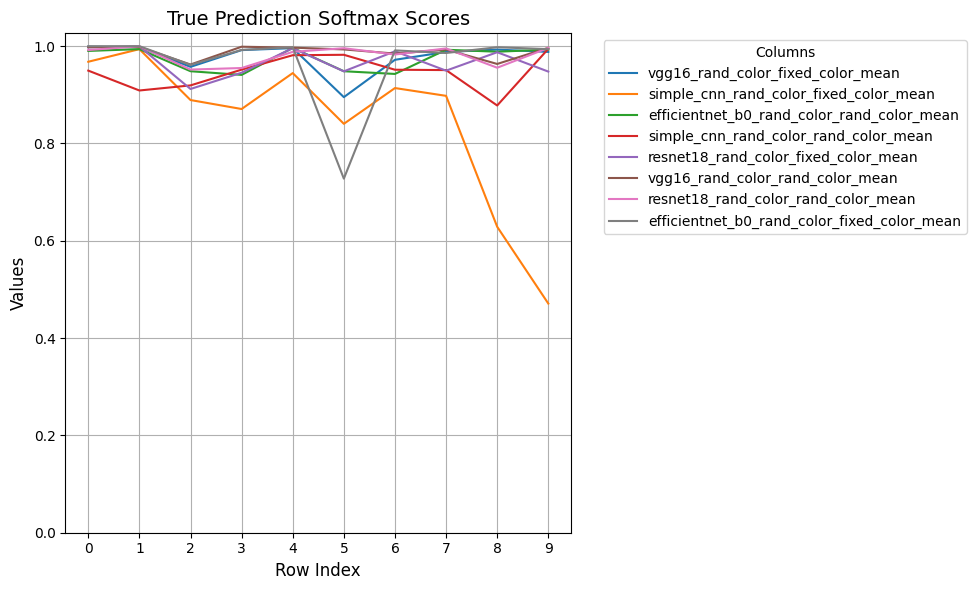

In [205]:
df = df_clubbed_mean
# Plot the line chart
plt.figure(figsize=(10, 6))  # Adjust the figure size
for column in df.columns:
    plt.plot(df.index, df[column], label=column)  # Plot each column as a line

# Customize the x-axis to show all rows (0-9)
plt.xticks(ticks=df.index, labels=df.index, fontsize=10)  # Ensure all row indices are visible

# Customize the y-axis with ticks in steps of 0.2
y_ticks = np.arange(0, 1.2, 0.2)  # Generate tick marks from 0 to 1 (adjust as needed)
plt.yticks(ticks=y_ticks, fontsize=10)

# Customize the chart
plt.title("True Prediction Softmax Scores", fontsize=14)
plt.xlabel("Row Index", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend(title="Columns", bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend
plt.grid(True)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


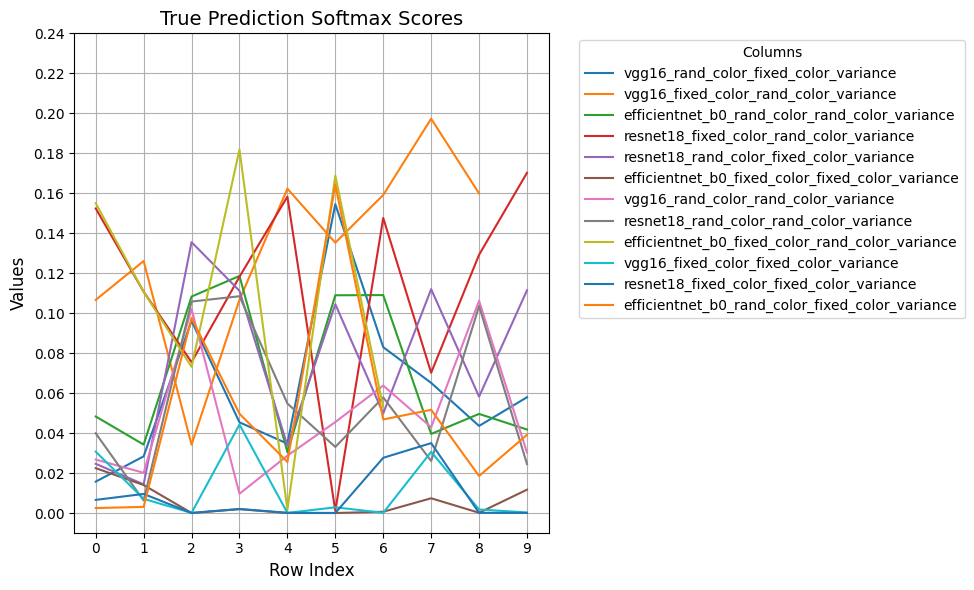

In [73]:
plt.figure(figsize=(10, 6))  

for column in df_clubbed_std.columns:
    plt.plot(df.index, df_clubbed_std[column], label=column)  
    
plt.title("True Prediction Softmax Scores", fontsize=14)

plt.xticks(ticks=df_clubbed_mean.index, labels=df_clubbed_mean.index, fontsize=10)  
y_ticks = np.arange(0, 0.25, 0.02)  # Generate tick marks from 0 to 1 (adjust as needed)
plt.yticks(ticks=y_ticks, fontsize=10)

plt.xlabel("Row Index", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend(title="Columns", bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend
plt.grid(True)
plt.tight_layout()  
plt.show()